In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [162]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_all=pd.concat([df_train,df_test]).reset_index()

## 分離目標

In [163]:
# 將目標分析欄位取出來
""" Your code hear: """
df_x1=df_all[["LotFrontage", "GarageYrBlt", "MasVnrArea"]]
df_x1_Origin=pd.melt(df_x1,value_vars=["LotFrontage", "GarageYrBlt", "MasVnrArea"])
df_x1_Origin["kind"]="Origin"
#以平均值補充
df_x1_fillna_mean=df_x1.fillna(df_x1.mean())
df_x1_fillna_mean1=pd.melt(df_x1_fillna_mean,value_vars=["LotFrontage", "GarageYrBlt", "MasVnrArea"])
df_x1_fillna_mean1['kind']='Mean'
#以中位數補充
df_x1_fillna_median=df_x1.fillna(df_x1.median())
df_x1_fillna_median1=pd.melt(df_x1_fillna_median,value_vars=["LotFrontage", "GarageYrBlt", "MasVnrArea"])
df_x1_fillna_median1['kind']='Median'
#合併
df_cocated=pd.concat([df_x1_Origin,df_x1_fillna_mean1,df_x1_fillna_median1])

## 繪圖

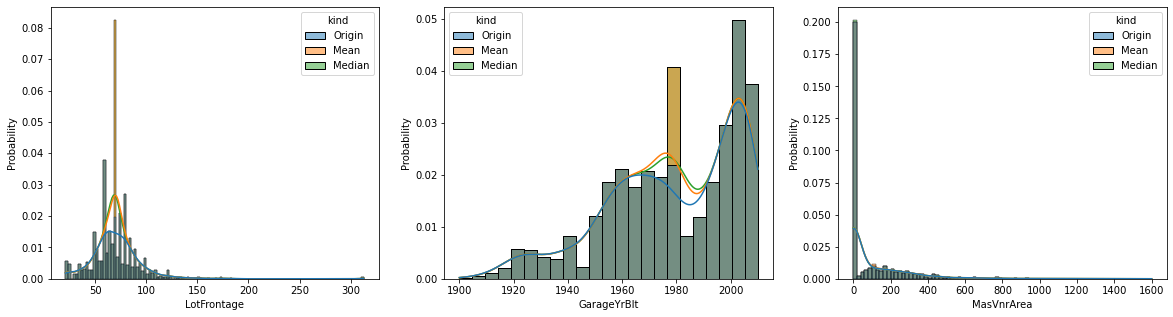

In [164]:
# 繪圖 直方圖
""" Your code hear: """
plt.figure(figsize=[20,5])
plt.subplot(131)
sns.histplot(x="value",data=df_cocated[df_cocated['variable']=='LotFrontage'],hue='kind',kde=True,stat="probability")
plt.xlabel('LotFrontage')
plt.subplot(132)
sns.histplot(x="value",data=df_cocated[df_cocated['variable']=='GarageYrBlt'],hue='kind',kde=True,stat="probability")
plt.xlabel('GarageYrBlt')
plt.subplot(133)
sns.histplot(x="value",data=df_cocated[df_cocated['variable']=='MasVnrArea'],hue='kind',kde=True,stat="probability")
plt.xlabel('MasVnrArea')
plt.show()

## 分析標準差

In [166]:
""" Your code hear: """
平均數標準差=df_x1_fillna_mean.std()
print(平均數標準差)
中位數標準差=df_x1_fillna_median.std()
print(中位數標準差)

LotFrontage     22.024023
GarageYrBlt     23.994583
MasVnrArea     180.569112
dtype: float64
LotFrontage     22.027677
GarageYrBlt     23.997022
MasVnrArea     180.731373
dtype: float64


## 透過分析標準差可以得到什麼結果？

In [175]:
print("好像沒什麼差別")

好像沒什麼差別
